In [2]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


   Cossim_model2  Cossim_model3  Cossim_model4  Cossim_model5  Cossim_model6
0       0.912127       0.937528       0.945815       0.924430       0.920243
1       0.911585       0.942861       0.944620       0.938781       0.910103
2       0.924240       0.941626       0.944929       0.934525       0.927734
3       0.880032       0.906801       0.926456       0.902748       0.890667
4       0.895284       0.923513       0.947501       0.914691       0.909491


<>:2: SyntaxWarning: invalid escape sequence '\c'
<>:2: SyntaxWarning: invalid escape sequence '\c'
C:\Users\81806\AppData\Local\Temp\ipykernel_30032\273174699.py:2: SyntaxWarning: invalid escape sequence '\c'
  file_path = "C:/Users/81806/OneDrive/共有ファイル/リモートデスクトップ/データセット\主成分分析\意味情報\cossim\cossim.xlsx"  # Update with your file path


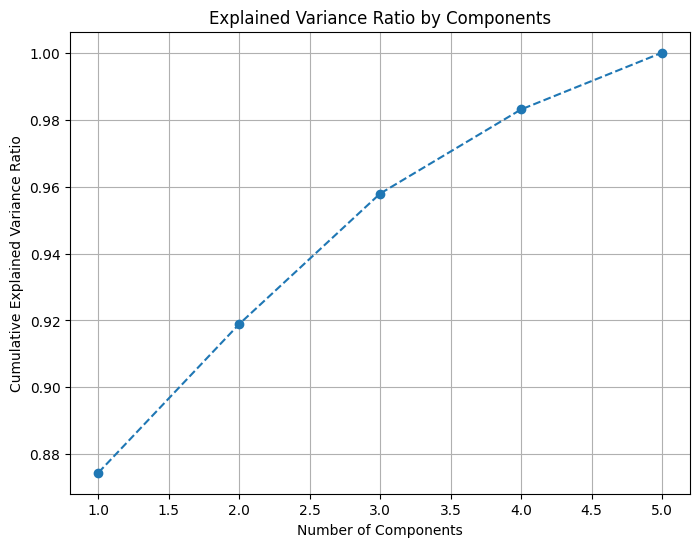

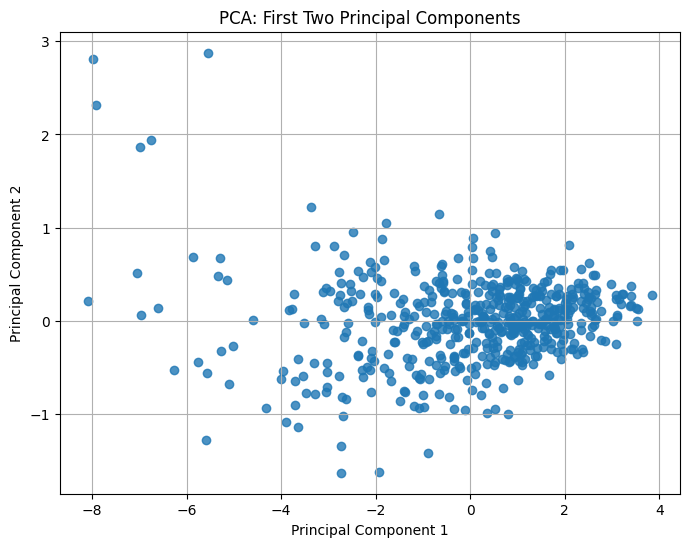

In [5]:

# Load the Excel file into a Pandas DataFrame
file_path = "C:/Users/81806/OneDrive/共有ファイル/リモートデスクトップ/データセット\主成分分析\意味情報\cossim\cossim.xlsx"  # Update with your file path
df = pd.read_excel(file_path)  # Assuming first column is the index
df = df.drop(columns="Cossim_model1")

# Optionally, inspect the data
print(df.head())

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca.fit(df_scaled)

# Determine the number of principal components to retain (e.g., by explained variance)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Choose the number of components based on the plot or a threshold (e.g., 90% variance explained)
# For example, selecting components that explain 90% of the variance:
n_components = (cumulative_variance_ratio <= 0.90).sum() + 1

# Perform PCA with the chosen number of components
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

# Optionally, visualize the transformed data or further analyze components
# For example, plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.8)
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Access PCA components and explained variance
components = pca.components_
explained_variance = pca.explained_variance_

# Optionally, reconstruct the data from PCA components
df_reconstructed = pca.inverse_transform(df_pca)


In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Excel file into a Pandas DataFrame
file_path = "C:/Users/81806/OneDrive/共有ファイル/リモートデスクトップ/データセット\主成分分析\意味情報\cossim\cossim.xlsx"  # Update with your file path
df = pd.read_excel(file_path)  # Assuming first column is the index

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Create a DataFrame for the PCA-transformed data
pca_transformed_data = pd.DataFrame(
    df_pca,
    columns=[f'PC{i+1}' for i in range(df_pca.shape[1])],  # Names for principal components
    index=df.index  # Preserve original index
)

# Save the transformed data to a CSV file
output_path = 'pca_transformed_data.csv'  # Update with desired output file path
pca_transformed_data.to_csv(output_path, index=True)
print(f"PCA-transformed data has been saved to {output_path}")

# Optionally, inspect the first few rows of the transformed data
print(pca_transformed_data.head())


PCA-transformed data has been saved to pca_transformed_data.csv
        PC1       PC2       PC3       PC4       PC5       PC6
0  2.081340  0.555525  0.062816  0.105209 -0.143604  0.049856
1  2.172211  0.530064  0.207655  0.418356 -0.431174  0.050754
2  2.325989  0.200122  0.182468  0.302367  0.035174 -0.057771
3  0.152450 -0.329696 -0.069563  0.216360 -0.224109 -0.106101
4  1.481742  0.515675 -0.168226 -0.062803 -0.355691 -0.015028


<>:8: SyntaxWarning: invalid escape sequence '\c'
<>:8: SyntaxWarning: invalid escape sequence '\c'
C:\Users\81806\AppData\Local\Temp\ipykernel_30032\3419727174.py:8: SyntaxWarning: invalid escape sequence '\c'
  file_path = "C:/Users/81806/OneDrive/共有ファイル/リモートデスクトップ/データセット\主成分分析\意味情報\cossim\cossim.xlsx"  # Update with your file path


: 

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# エクセルファイルからデータを読み込む
# file_path = "C:/Users/81806/OneDrive/共有ファイル/リモートデスクトップ/データセット/主成分分析/意味情報/avecossim/avecossim.xlsx"
# file_path = "C:/Users/81806/OneDrive/共有ファイル/リモートデスクトップ/データセット/3. 特徴量加工/3.2. 特徴量作成.xlsx"
file_path = "C:/Users/thisi/OneDrive/共有ファイル/卒研B　データセット/主成分分析/vif_result_test.csv"
sheet_name = 'Sheet1'  # シート名を指定してください

# Excelファイルを読み込み、データフレームに変換する
df = pd.read_csv(file_path)
target = ["Percentage_of_katakana_noun", "Percentage_of_katakana_noun_numerator"]
df = df[target]

# 主成分分析のために数値データを準備する
X = df.select_dtypes(include=['number']).values

# データを標準化する（主成分分析では標準化が推奨される）
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 主成分分析を実行する
n_components = 1  # 圧縮する次元数を指定する（例として3とします）
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(X_scaled)

# 主成分の寄与率を取得する
explained_variance_ratio = pca.explained_variance_ratio_

# 寄与率を表示する
print("Explained variance ratio:", explained_variance_ratio)

# 圧縮されたデータをデータフレームに変換してCSVファイルに出力する
compressed_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
output_csv_path = 'C:/Users/thisi/OneDrive/共有ファイル/卒研B　データセット/主成分分析/katakana_noun/compressed_data.csv'
compressed_df.to_csv(output_csv_path, index=False)

print(f"Compressed data saved to {output_csv_path}")


Explained variance ratio: [0.90499687]
Compressed data saved to C:/Users/thisi/OneDrive/共有ファイル/卒研B　データセット/主成分分析/katakana_noun/compressed_data.csv
